## 사이킷런을 이용하여 붓꽃(Iris) 데이터 품종 예측하기



In [1]:
# 사이킷런 버전 확인, anaconda 설치시에는 0.24.2버전
import sklearn
print(sklearn.__version__)

1.0.2


 [싸이킷런 도큐먼트] https://scikit-learn.org/stable/
 
 [업그레이드] https://scikit-learn.org/dev/install.html

In [ ]:
# Jupyter Notebook 브라우저 close
# 1.0.2 버전으로 업그레이드
# anaconda prompt(관리자모드)에서 pip install scklit-learn==1.0.2

In [ ]:
pip install scikit-learn==1.0.2

In [ ]:
import sklearn
print(sklearn.__version__)

## 붓꽃(iris) 품종 분류 모델 만들기
[sklearn.datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)

`sklearn.dataset`에서 제공해주는 다양한 샘플 데이터를 활용합니다.

### 모델 구현을 위한 라이브러리 import 

In [2]:
import sklearn

# load_iris: sklearn 라이브러리에 포함된 데이터셋을 불러오는 datasets 패키지
from sklearn.datasets import load_iris

# DecisionTree 알고리즘 사용
from sklearn.tree import DecisionTreeClassifier

# 학습 데이터과 테스터 데이터 분리
from sklearn.model_selection import train_test_split

### 데이터세트 준비(iris 데이터셋 load 및 데이터 확인)<br>


In [3]:
import pandas as pd

# 붓꽃 데이터 세트 로드
iris = load_iris()

In [4]:
iris

# iris 속에 어떤 데이터가 어떤 구조로 존재하는지 확인
# iris는 dictionary 형태의 데이터
# array는 numpy 데이터 형태
# 네 개의 값(열)이 들어있는 array가 150개
# 'target' 키는 정답 데이터: 0, 1, 2로 구성
# 'target_names' 키는 0, 1, 2가 각각 실제로 어떤 종류의 꽃을 의미하는지
# 'feature_names' 키는 컬럼명

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

* `DESCR`: 데이터셋의 정보를 보여줍니다.
* `data`: feature data
* `feature_names`: feature data의 컬럼 이름
* `target`: label data (수치형)
* `target_names`: label의 이름 (문자형)

In [5]:
# 위에서 'DESCR' 키의 value가 너무 복잡하게 출력되었음
# print() 활용하면 좀 더 보기 편하게 출력할 수 있음

# iris description
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
# iris 데이터의 key 목록 확인
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
# iris의 feature데이터 (dictionary 추출)
iris_data = iris.data # iris['data']

print(iris_data[:5])
print(iris.feature_names) # iris['feature_names']

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
#iris의 target데이터
iris_label = iris.target # 레이블과 target 모두 정답 데이터를 의미

print('iris target 값:', iris_label)
print('iris target 명:', iris.target_names)

iris target 값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target 명: ['setosa' 'versicolor' 'virginica']


In [9]:
# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환
# 따로 존재하던 data와 target을 하나의 DataFrame으로 합침
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names) # 컬럼명 feature_names로 설정
iris_df['label'] = iris_label

iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


### 시각화


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 불필요한 경고 출력을 방지
warnings.filterwarnings('ignore')

In [11]:
# iris_df의 컬럼명 출력
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'label'],
      dtype='object')

Text(0.5, 1.0, 'Sepal')

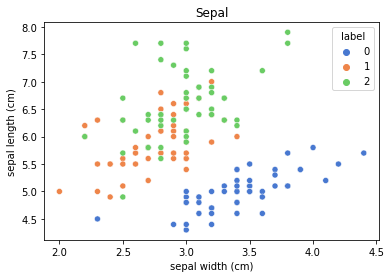

In [12]:
# column name: ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
# x, y 값 각각 sepal width, sepal length
sns.scatterplot('sepal width (cm)', 'sepal length (cm)', data=iris_df,
                hue='label', palette='muted')
    
#title 추가
plt.title('Sepal')

Text(0.5, 1.0, 'Petal')

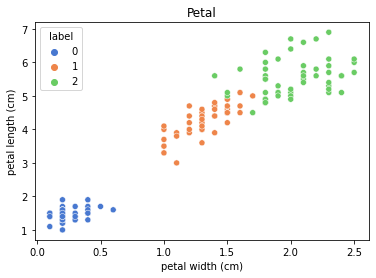

In [13]:
sns.scatterplot('petal width (cm)', 'petal length (cm)', data=iris_df,
                hue='label', palette='muted')
    
#title 추가
plt.title('Petal')

### 학습 데이터와 테스트 데이터로 분리
- 머신러닝의 첫 번째 단계
- train_test_split: 데이터의 분할(학습/테스트)을 쉽게 할 수 있는 API

#### train_test_split의 파라미터
- test_size: 테스트 데이터의 비율
- train_size: 학습 데이터의 비율(test_size 지정 시 자동으로 설정되어 주로 생략)
- shuffle: 분리에 앞서 데이터를 미리 섞을지 여부
- random_state: 실행할 때마다 동일한 난수를 생성하기 위한 값

In [14]:
# iris_data: feature 값만 있는 데이터 (iris.data)
# test_size: 20%
X_train, X_test, y_train, y_test = train_test_split(iris_data,
                                                   iris_label,
                                                   test_size=0.2,
                                                   random_state=11)

# train_test_split는 기본적으로 네 개로 분할된 데이터를 반환(튜플 형태)
# 분할된 데이터를 네 개의 변수에 각각 할당
# 앞의 두 개 변수는 학습/테스트 데이터
# 뒤의 두 개 변수는 학습/테스트 데이터에 대한 정답
# random_state 값에는 아무 숫자 삽입 (학습/테스트 데이터 추출 결과가 매번 바뀌지 않도록 고정)

In [15]:
# 학습 데이터 feature, 학습 데이터 label 크기 출력
print(X_train.shape, y_train.shape)

# 학습 데이터는 120 x 4, 정답 데이터는 120 x 1

(120, 4) (120,)


In [16]:
print(X_test.shape, y_test.shape)

(30, 4) (30,)


In [17]:
#참고
import collections
print(collections.Counter(y_train)) # 각각의 값이 몇 개씩 있는지 확인

Counter({0: 41, 1: 40, 2: 39})


<AxesSubplot:ylabel='count'>

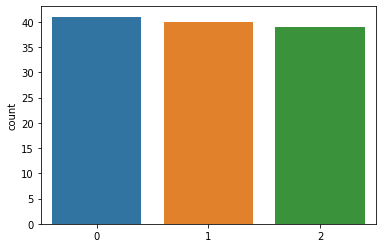

In [18]:
#seaborn의 countplot으로 레이블별 개수 시각화
sns.countplot(y_train)

- train_test_split에서 stratify: label의 클래스의 분포를 균등하게 배분

In [19]:
X_train, X_test, y_train, y_test = train_test_split(iris_data,
                                                    iris_label,
                                                    test_size=0.2,
                                                    stratify=iris_df['label'])

In [20]:
print(collections.Counter(y_train)) # 40개씩 균등하게 분포

Counter({1: 40, 0: 40, 2: 40})


<AxesSubplot:ylabel='count'>

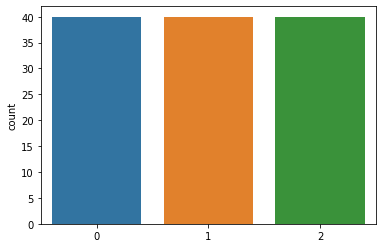

In [21]:
sns.countplot(y_train)

### 학습 데이터 세트로 학습(Train) 

In [22]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree 모델(DecisionTreeClassifier) 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

# Decision Tree 모델 객체 학습 수행
dt_clf.fit(X_train, y_train) # 학습에는 테스트 데이터와 정답 데이터 모두 제공

DecisionTreeClassifier(random_state=11)

### 테스트 데이터 세트로 예측(Predict) 

In [23]:
# 테스트 데이터를 이용한 예측
pred = dt_clf.predict(X_test)

# 예측할 때는 정답 데이터는 제공하지 않고, 테스트 데이터만 제공

In [24]:
pred # 예측 결과

array([0, 2, 0, 2, 2, 2, 1, 2, 0, 0, 1, 1, 1, 1, 2, 1, 0, 0, 1, 2, 2, 0,
       1, 0, 0, 1, 2, 2, 2, 0])

### 예측 정확도 평가 (Accuracy 를 통한 성능평가)

In [25]:
# Accuracy(정확도)를 통한 성능평가

from sklearn.metrics import accuracy_score

acc_score = accuracy_score(y_test, pred) # 정답 데이터와 비교

print(f'예측 정확도: {acc_score:.4f}') # 소수점 아래 4자리까지 표시
#print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))
print(f'predict accuracy: {accuracy_score(y_test, pred): .4f}')

예측 정확도: 0.9667
predict accuracy:  0.9667
